In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set()
%precision 3

'%.3f'

In [3]:
sp.pi#円周率

3.142

In [5]:
sp.stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

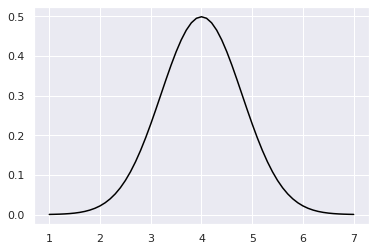

In [6]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
        x_plot,
        sp.stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
        color = 'black')

In [7]:
np.random.seed(1)

simulated_sample = sp.stats.norm.rvs(
  loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [9]:
sp.sum(simulated_sample <= 3)

10371

In [10]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

## 累積分布関数

・　確率変すXに対して、xを実数とするとき下記のように表されるF(X)を**累積分布関数**と呼ぶ。

F（X）＝P（X＜＝x）

つまりある値以下となる確率を計算してくれるもの


In [12]:
#実装
sp.stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [13]:
sp.stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 下側確率とパーセント点

データがある値以下となる確率のことを**下側確率**と呼ぶ。

ある確率になる基準値のことを**パーセント点**と呼ぶ。

In [14]:
#Implementation(When the data falls below a certain value)
sp.stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [15]:
#Implementation(The threshold for a certain probability)
#(the case the point of percent will be lower probability of 50%)
sp.stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

## t値

$$t値= \frac{標本平均ー母平均}{標準誤差}$$

In [18]:
np.random.seed(1)
t_value_array = np.zeros(10000)
norm_dist = sp.stats.norm(loc = 4, scale = 0.8)
for t in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[t] = (sample_mean - 4) / sample_se

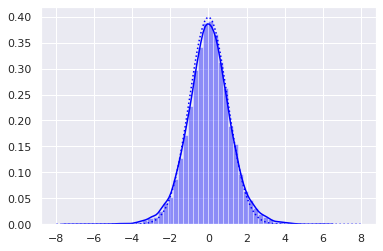

In [20]:
sns.distplot(t_value_array, color = "blue")
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, sp.stats.norm.pdf(x = x), 
        color = 'blue', linestyle = 'dotted')

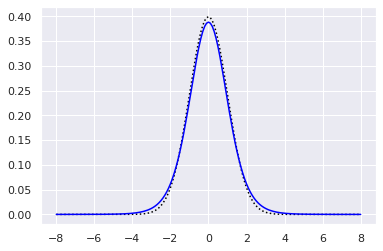

In [22]:
#implement t distributions
plt.plot(x, sp.stats.norm.pdf(x = x),
        color = 'black',
        linestyle = 'dotted')
plt.plot(x, sp.stats.t.pdf(x = x, df = 9),
        color = 'blue')